In [213]:
# Reference 1 : Codes & Hints provided by Prof. Matthew Murphy
# Reference 2 : Raschka textbook

# importing relevant libraries

import sklearn
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [214]:
# Loading credit score data

cs_df=pd.read_csv('MLF_GP1_CreditScore.csv')

In [186]:
# setting larger column limit for cell output

pd.options.display.max_columns = 2000

In [187]:
# printing top 5 samples of dataset

cs_df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [188]:
# summary statistics of entire dataset

cs_df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,-0.312325,0.731197,-0.819863,0.092043,1.270202,-0.398624,-0.165088,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,8.895136,12.280493,22.002550,0.385111,22.797054,41.235876,6.277606,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,-238.750000,-0.910486,-495.355952,-0.871567,-0.939190,-781.502439,-172.654240,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,-0.527219,-0.134477,-0.181621,-0.113241,-0.206442,-0.267345,-0.211115,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,-0.058475,-0.012302,-0.034452,0.066836,-0.018464,-0.032055,0.012847,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,0.396581,0.141443,0.163697,0.236566,0.242868,0.274710,0.251992,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,125.785869,256.050232,360.926171,3.961121,676.443064,1352.088710,15.821709,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [189]:
# checking for missing values

cs_df.isnull().values.sum()

0

In [190]:
# print data types of all the variables

cs_df.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [191]:
# print info of the dataset

print(cs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Sales/Revenues              1700 non-null float64
Gross Margin                1700 non-null float64
EBITDA                      1700 non-null float64
EBITDA Margin               1700 non-null float64
Net Income Before Extras    1700 non-null float64
Total Debt                  1700 non-null float64
Net Debt                    1700 non-null float64
LT Debt                     1700 non-null float64
ST Debt                     1700 non-null float64
Cash                        1700 non-null float64
Free Cash Flow              1700 non-null float64
Total Debt/EBITDA           1700 non-null float64
Net Debt/EBITDA             1700 non-null float64
Total MV                    1700 non-null float64
Total Debt/MV               1700 non-null float64
Net Debt/MV                 1700 non-null float64
CFO/Debt                    1700 non-null float64
CFO                         1700 non-null f

In [192]:
# counts of class variables

count_Inv = cs_df['InvGrd'].value_counts()

count_rating = cs_df['Rating'].value_counts()

print(count,"\n")
print(count_rating)

1    1287
0     413
Name: InvGrd, dtype: int64 

Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64


In [193]:
# making a copy of the dataset

cs_df_rp = cs_df

In [158]:
# checking the copy

print(cs_df_rp.shape, "/n")
print(cs_df_rp.head())

(1700, 28) /n
   Sales/Revenues  Gross Margin    EBITDA  EBITDA Margin  \
0       -0.005496      0.030763  0.018885       0.024515   
1       -0.005496      0.030763  0.088716       0.094733   
2       -0.007045      0.023159  0.088716       0.096440   
3       -0.009396      0.028400  0.088716       0.099046   
4       -0.009009      0.027714  0.088716       0.098611   

   Net Income Before Extras  Total Debt  Net Debt   LT Debt   ST Debt  \
0                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
1                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
2                  0.108590    0.039410  0.034268  0.009059  0.250371   
3                  0.146137    0.030071  0.036938 -0.016964  0.356994   
4                  0.123500    0.024224  0.034445 -0.034132  0.461894   

       Cash  Free Cash Flow  Total Debt/EBITDA  Net Debt/EBITDA  Total MV  \
0 -0.133716        0.352997          -0.047694        -0.037474  0.263605   
1 -0.133716        0.352997     

In [194]:
# creating dictionary to map rating values to numeric values

labels = cs_df_rp['Rating'].astype('category').cat.categories.tolist()

replace_map_comp = {'Rating' : {k : v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print (replace_map_comp)

{'Rating': {'A1': 1, 'A2': 2, 'A3': 3, 'Aa2': 4, 'Aa3': 5, 'Aaa': 6, 'B1': 7, 'B2': 8, 'B3': 9, 'Ba1': 10, 'Ba2': 11, 'Ba3': 12, 'Baa1': 13, 'Baa2': 14, 'Baa3': 15, 'Caa1': 16}}


In [195]:
# replacing values of Rating with the numeric values

cs_df_rp.replace(replace_map_comp, inplace = True)

print(cs_df_rp.head())

   Sales/Revenues  Gross Margin    EBITDA  EBITDA Margin  \
0       -0.005496      0.030763  0.018885       0.024515   
1       -0.005496      0.030763  0.088716       0.094733   
2       -0.007045      0.023159  0.088716       0.096440   
3       -0.009396      0.028400  0.088716       0.099046   
4       -0.009009      0.027714  0.088716       0.098611   

   Net Income Before Extras  Total Debt  Net Debt   LT Debt   ST Debt  \
0                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
1                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
2                  0.108590    0.039410  0.034268  0.009059  0.250371   
3                  0.146137    0.030071  0.036938 -0.016964  0.356994   
4                  0.123500    0.024224  0.034445 -0.034132  0.461894   

       Cash  Free Cash Flow  Total Debt/EBITDA  Net Debt/EBITDA  Total MV  \
0 -0.133716        0.352997          -0.047694        -0.037474  0.263605   
1 -0.133716        0.352997          -0.108776

In [196]:
# printing counts of rating variable in the new dataset, after replacement

cs_df_rp['Rating'].value_counts()

14    326
15    232
13    179
5     174
2     156
11    125
1     122
12    108
7      69
4      65
8      48
9      37
3      31
10     17
16      9
6       2
Name: Rating, dtype: int64

In [215]:
cs_df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [197]:
# creating feature matrix

X = cs_df_rp.drop(['InvGrd','Rating'], axis = 1)

In [198]:
# checking dimension of X

print (X.shape,"\n")

(1700, 26) 



In [199]:
# printing top 5 samples of X

X.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144


In [200]:
# printing bottom 5 samples of X

X.tail()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
1695,-0.099327,-0.010702,-0.127046,-0.030785,-4.349569,0.124830,0.146400,0.008407,0.364676,-0.028333,1.106048,0.288532,0.313242,0.165751,-0.035103,-0.016600,0.348290,0.516587,-0.190974,0.603271,-0.150779,0.144187,-4.408257,-1.339781,-4.271318,-5.168673
1696,-0.116919,-0.009799,-0.155183,-0.043333,-2.937747,0.157873,0.066243,0.084104,0.309846,0.808505,3.336889,0.370560,0.262099,0.386061,-0.164631,-0.230739,1.453531,1.840865,-0.246259,0.007110,0.604043,0.127468,-2.977064,-1.695900,-2.868086,-3.429429
1697,-0.099676,0.067595,-0.170022,-0.078134,-1.960264,0.023226,-0.201398,0.024856,0.020078,1.352542,-2.531238,0.232835,-0.037804,-0.117449,0.159396,-0.095122,-2.785428,-2.826901,-0.266848,-0.959809,1.227363,0.056198,-1.955285,-1.919739,-1.876336,-1.940995
1698,-0.088853,0.007820,-0.122645,-0.037088,-2.066509,0.067495,-0.011377,0.289219,-0.171802,0.671224,-0.688930,0.216720,0.126822,-0.507272,1.166502,1.006429,-0.584309,-0.556247,-0.226685,-0.438389,0.865331,-0.104059,-2.059347,-1.462429,-2.027254,-2.059961
1699,-0.084739,-0.021961,-0.159290,-0.081442,-1.953166,-0.043481,-0.285966,0.045902,-0.179549,1.987960,2.148336,0.137752,-0.150677,-0.122627,0.090208,-0.186168,1.915894,1.789100,-0.219651,-0.977050,2.167547,-0.056695,-1.948856,-1.918602,-1.952314,-1.758980


In [201]:
# creating dependent variable vector, for InvGrd

y_i = cs_df_rp['InvGrd']

In [202]:
# checking dimension of y_i

y_i.shape

(1700,)

In [203]:
# printing samples of y_i

print(y_i.head())
print(y_i.tail())

0    1
1    1
2    1
3    1
4    1
Name: InvGrd, dtype: int64
1695    0
1696    0
1697    0
1698    0
1699    0
Name: InvGrd, dtype: int64


In [204]:
# creating dependent variable vector, for rating

y_r = cs_df_rp['Rating']

In [205]:
# checking dimension of y_r

y_r.shape

(1700,)

In [206]:
# printing samples of y_r

print(y_r.head())
print(y_r.tail())

0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64
1695    16
1696    16
1697    16
1698    16
1699    16
Name: Rating, dtype: int64


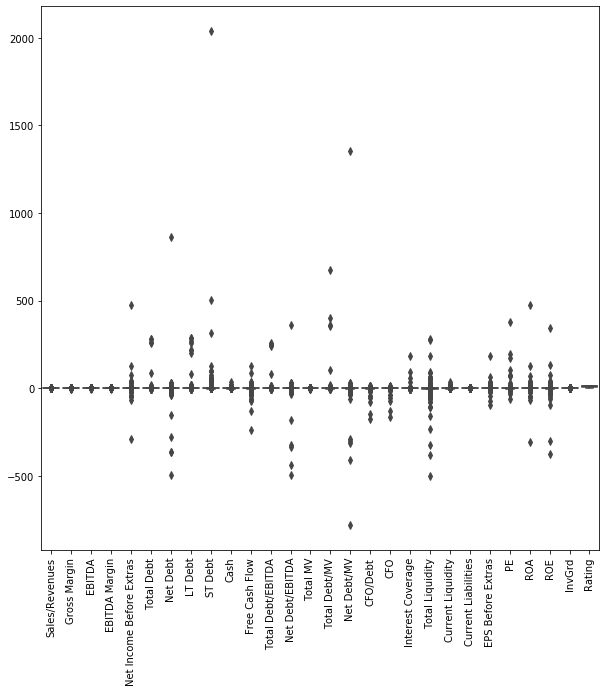

In [172]:
# Box plot of the dataset

plt.figure(figsize=(10,10))

plt.xticks(rotation=90)

sns.boxplot(data = cs_df_rp)


In [207]:
# There are some outliers and imputations can be done to improve the model performance

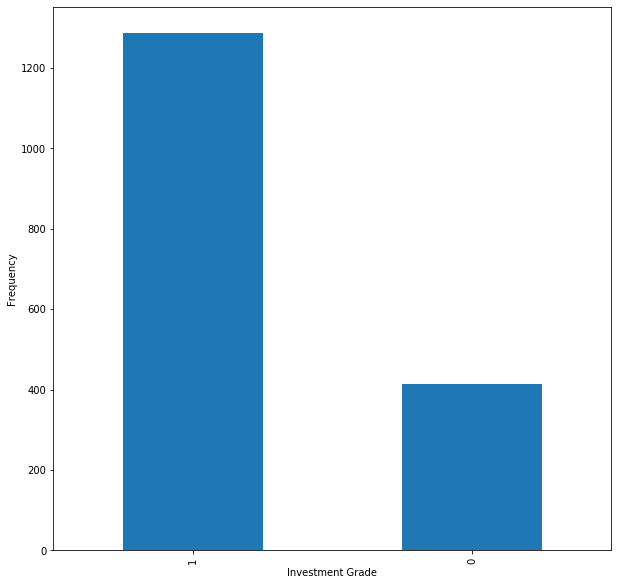

In [220]:
# Plotting Histogram of Investment Grade

hist = plt.figure(figsize =(10,10))
hist = plt.xlabel('Investment Grade')
hist = plt.ylabel('Frequency')

pd.Series(cs_df['InvGrd']).value_counts().plot('bar')

In [209]:
# Printing counts of InvGrd variable

pd.Series(cs_df['InvGrd']).value_counts()

1    1287
0     413
Name: InvGrd, dtype: int64

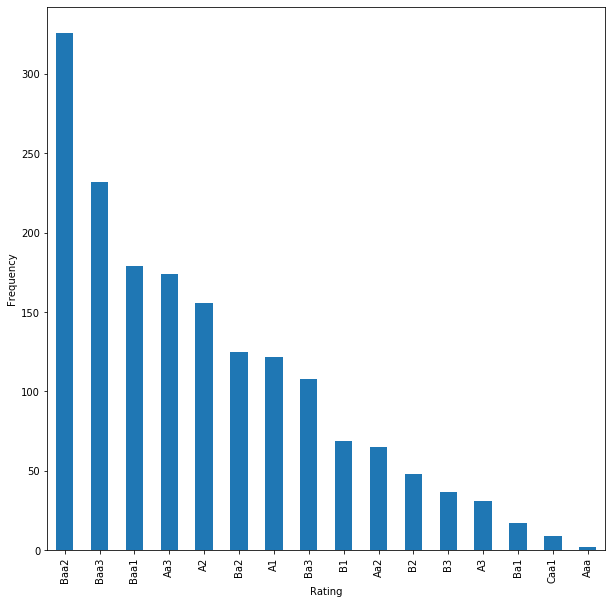

In [221]:
# Plotting Histogram of Rating

hist = plt.figure(figsize =(10,10))

hist = plt.xlabel('Rating')
hist = plt.ylabel('Frequency')

pd.Series(cs_df['Rating']).value_counts().plot('bar')

In [217]:
# printing counts of Rating

pd.Series(cs_df['Rating']).value_counts()

Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

In [222]:
# creating index of column names in the dataset

a=cs_df_rp.columns

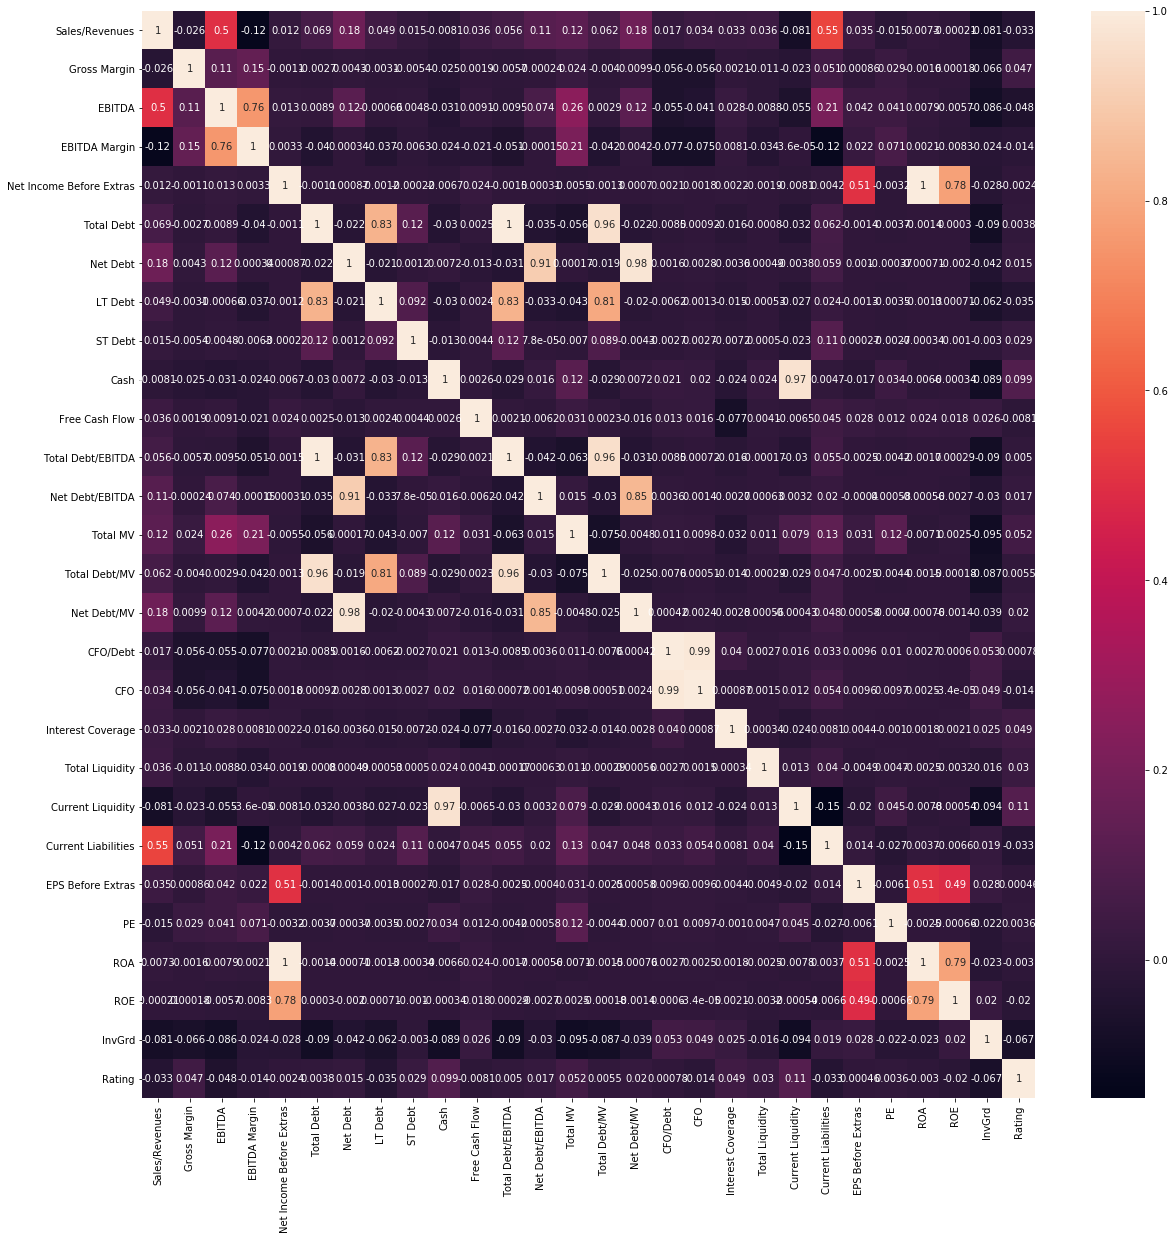

In [223]:
# calculating correlation matrix and plotting heatmap

corr = cs_df_rp.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,yticklabels=a,
                      xticklabels=a)


In [112]:
# variables for scatter plots (taking variables which are correlated and few uncorrelated variables)

corr_vars_1 = ['Sales/Revenues','Current Liabilities','EBITDA','EBITDA Margin','Net Income Before Extras',
             'EPS Before Extras','ROA','ROE','Current Liquidity','Cash','InvGrd','Rating']


corr_vars_2 = ['Total Debt','LT Debt','Total Debt/EBITDA','Total Debt/MV','Net Debt/EBITDA','Net Debt/MV', 
               'Net Debt','InvGrd','Rating']

In [113]:
# printing correlation matrix

print(corr)

                          Sales/Revenues  Gross Margin    EBITDA  \
Sales/Revenues                  1.000000     -0.026318  0.500178   
Gross Margin                   -0.026318      1.000000  0.114092   
EBITDA                          0.500178      0.114092  1.000000   
EBITDA Margin                  -0.124079      0.147886  0.757142   
Net Income Before Extras        0.012024     -0.001061  0.012565   
Total Debt                      0.068938     -0.002665  0.008949   
Net Debt                        0.175741      0.004266  0.119251   
LT Debt                         0.048960     -0.003149 -0.000665   
ST Debt                         0.014987     -0.005417  0.004844   
Cash                           -0.008088     -0.024540 -0.030773   
Free Cash Flow                  0.035716      0.001920  0.009102   
Total Debt/EBITDA               0.056092     -0.005690 -0.009527   
Net Debt/EBITDA                 0.110201     -0.000236  0.074284   
Total MV                        0.123111      0.

<Figure size 1440x1440 with 0 Axes>

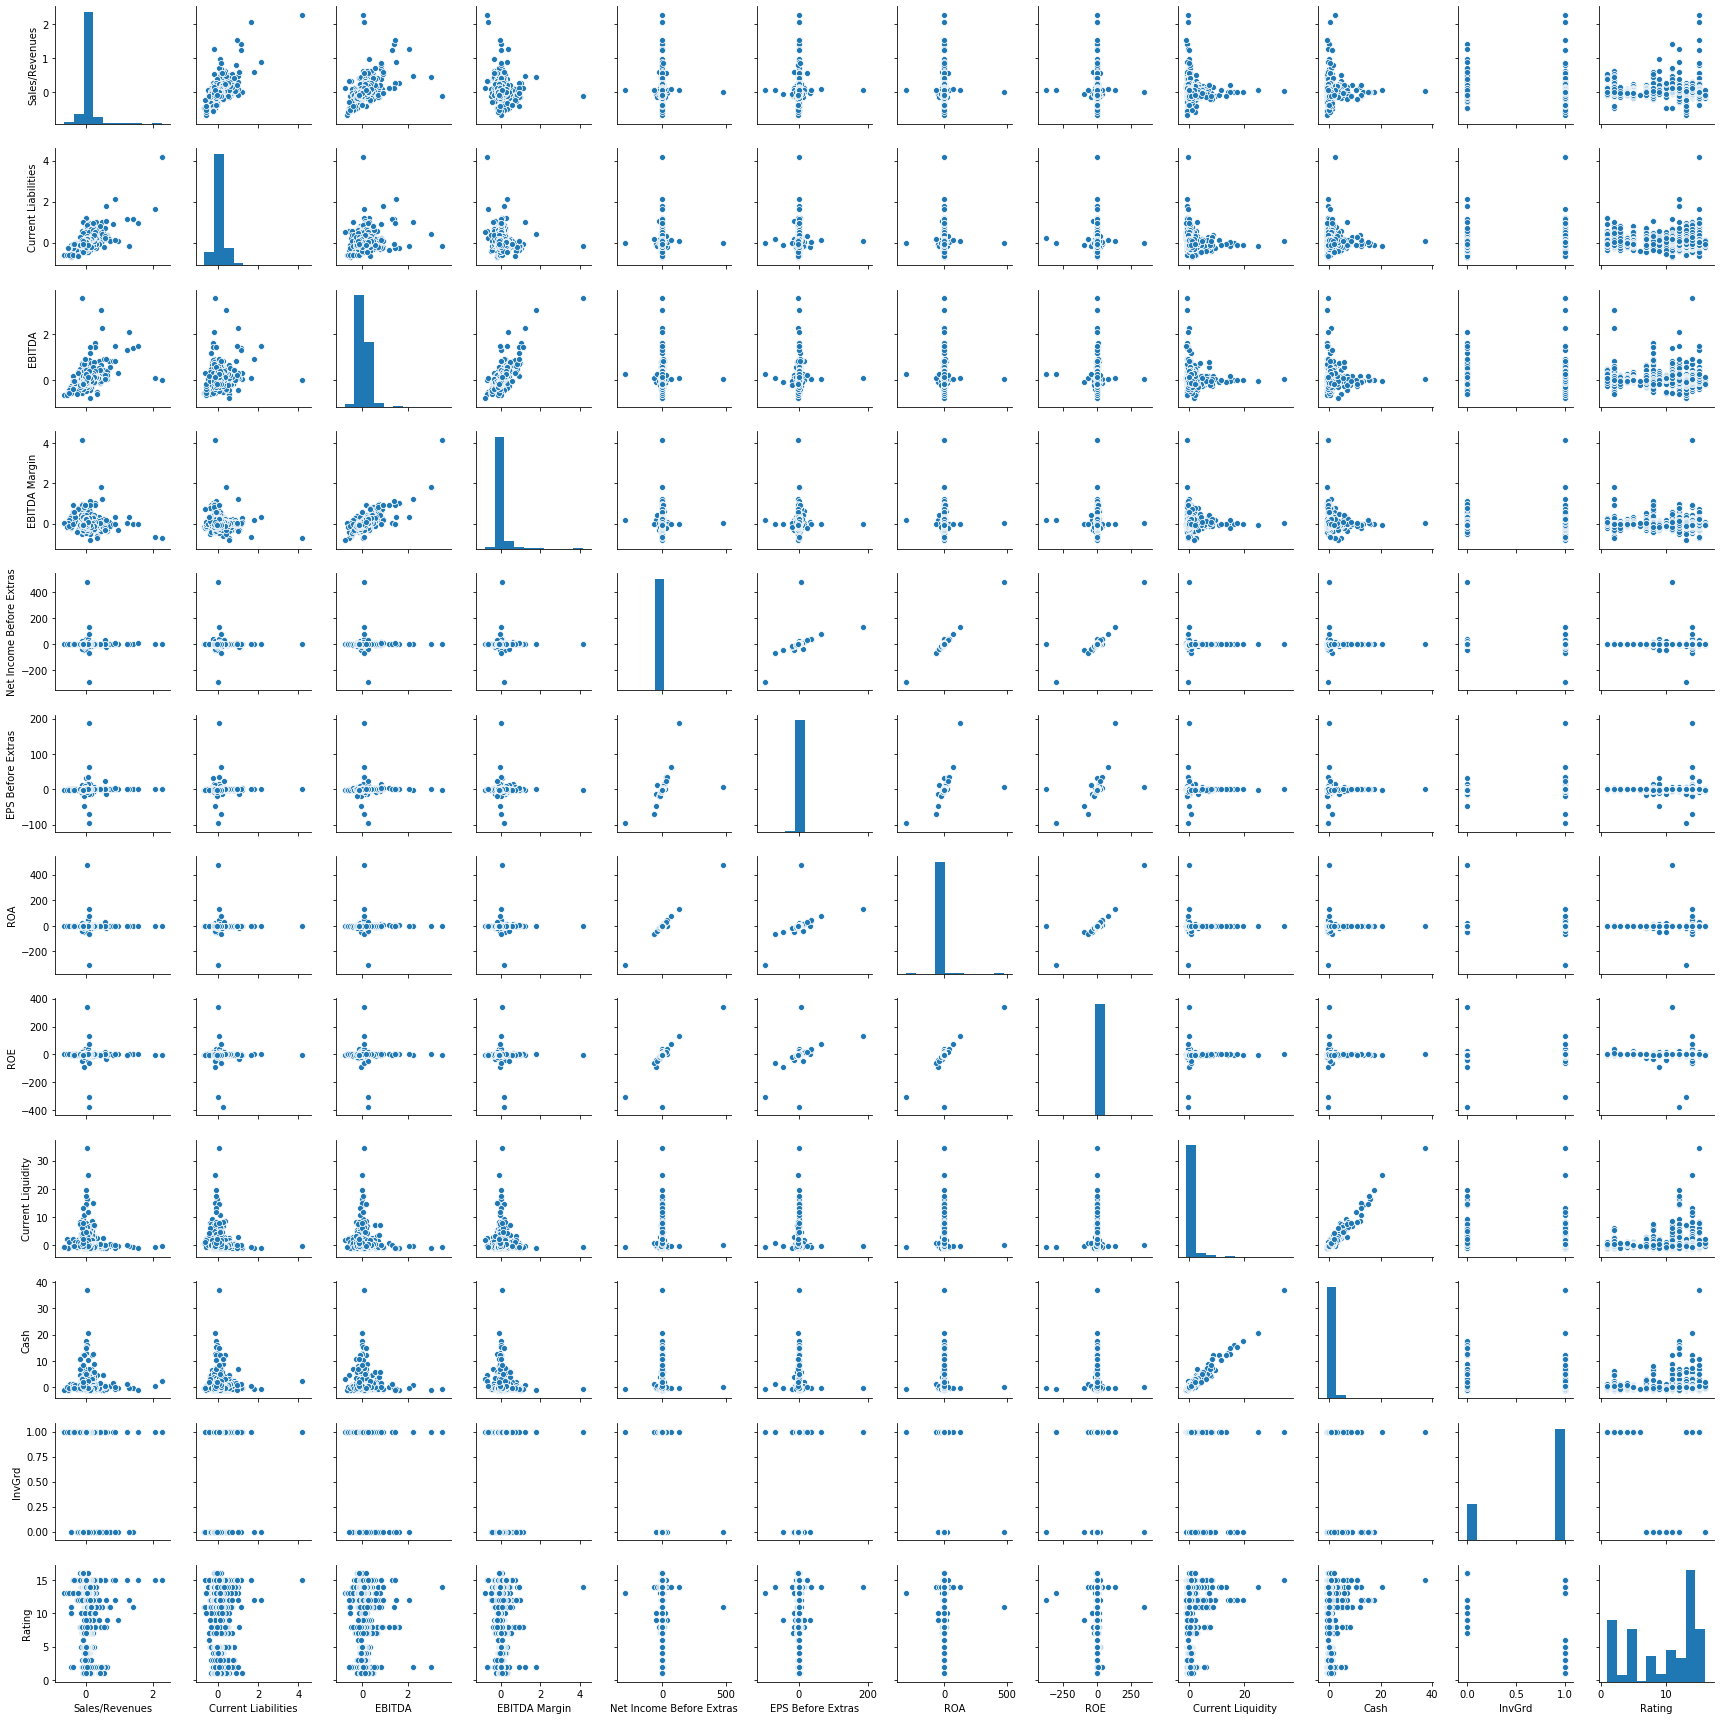

In [114]:
# scatter plots of correlated variables - 1

plot1 = plt.figure(figsize=(20,20))

plot1 = sns.pairplot(cs_df_rp[corr_vars_1],height=2)
plot1 = plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

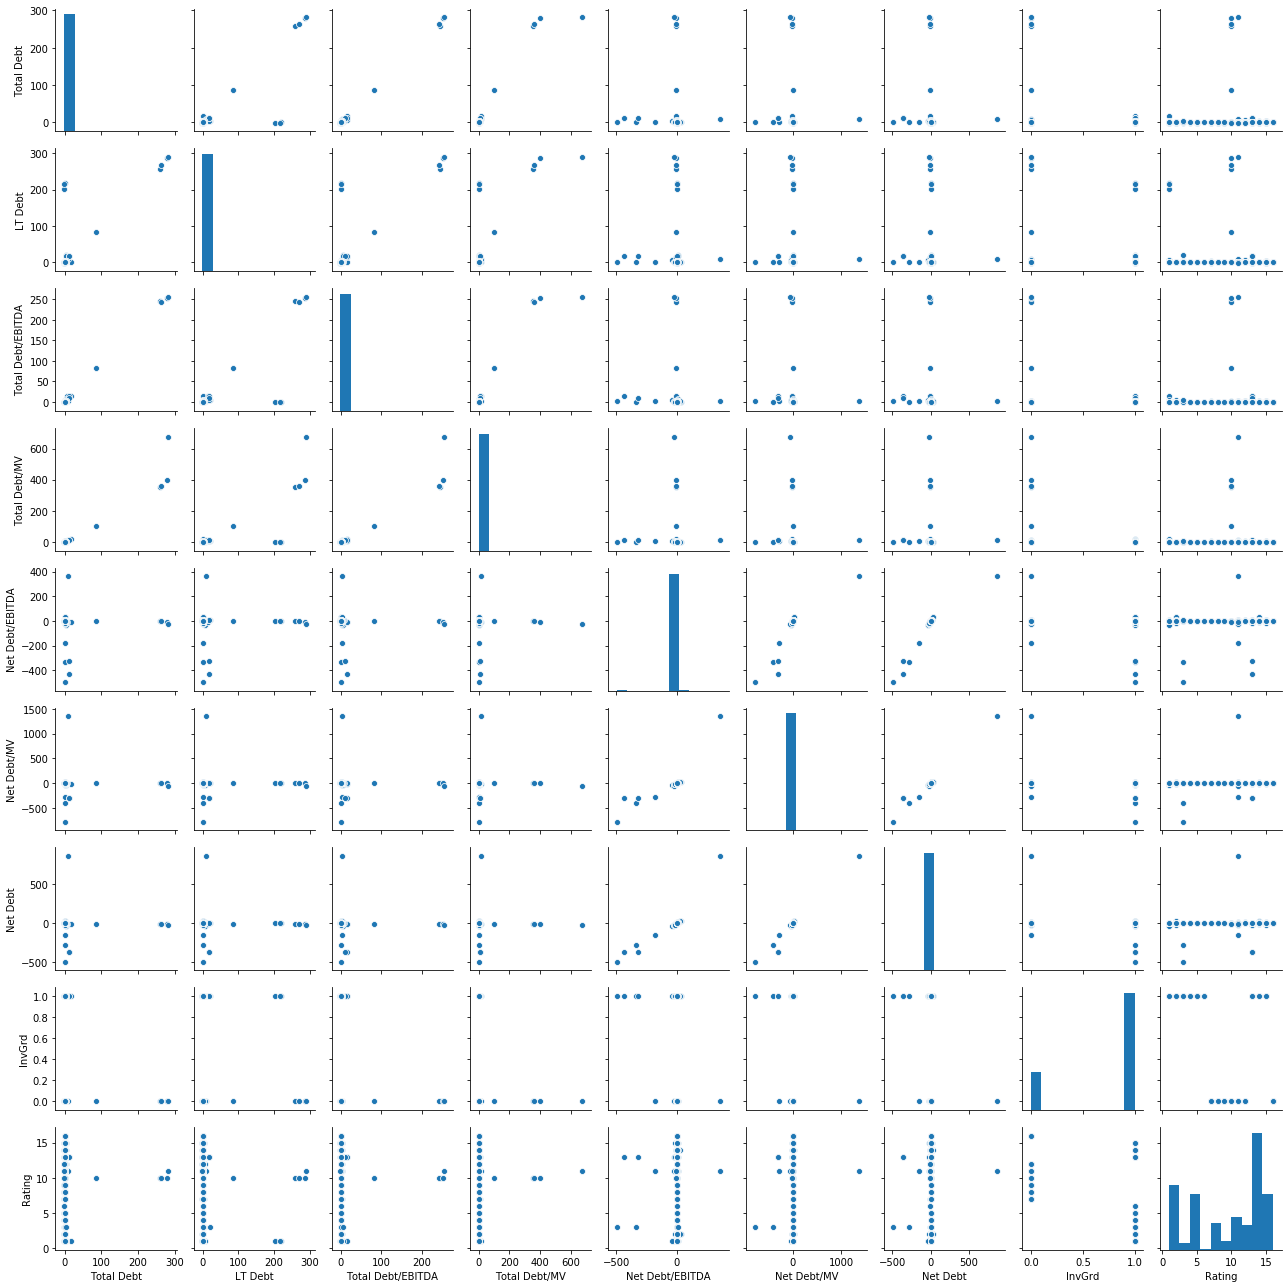

In [115]:
# scatter plots of correlated variables - 2

plot2 = plt.figure(figsize=(20,20))

plot2 = sns.pairplot(cs_df_rp[corr_vars_2],height=2)
plot2 = plt.tight_layout()
plt.show()

In [116]:
# Feature selection using correlation heatmap

# Variables that can be removed because of correlation for feature selection

# from scatter plots 1 -  ('EBITDA', 'EBITDA Margin'), ('Net Income Before Extras', 'ROA', 'ROE'), 
# ('Current Liquidity', 'Cash')
# these combinations are correlated, so out of these 7 variables, 3 variables can be selected :
# selection based on correlation with 'InvGrd' & 'Rating' : 
# selected ones for 'InvGrd' : ('EBITDA','Net Income Before Extras', 'Current Liquidity')
# selected ones for 'Rating' : ('EBITDA', 'ROE', 'Current Liquidity')

# from scatter plots 2 - ('Total Debt','LT Debt','Total Debt/EBITDA','Total Debt/MV')
# ('Net Debt/EBITDA','Net Debt/MV', 'Net Debt')
# these combinations are correlated, so out of these 7 variables, 2 variables can be selected :
# selected ones for 'InvGrd' : ('Total Debt','Net Debt')
# selected ones for 'Rating' : ('Total Debt/MV','Net Debt/MV')

# So from these 14 variables, we can select 5 variables for our model, without loss of explained variance
# (we have to check using evaluation metrics, whether this feature selection gives best results


In [ ]:
# Binary Classification

In [225]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X)

exp_var = pca.explained_variance_ratio_

cum_exp_var = np.cumsum(exp_var)

print("explained variance: ", exp_var, "\n")
print("cumulative explained variance: ", cum_exp_var)

explained variance:  [3.43047199e-01 3.25324928e-01 1.20717674e-01 7.24409782e-02
 6.28795206e-02 1.75279579e-02 1.34937683e-02 9.49562533e-03
 8.50716279e-03 8.32593599e-03 7.69529261e-03 3.29035410e-03
 3.20490490e-03 1.70619518e-03 1.34038953e-03 8.30711631e-04
 6.59285613e-05 3.64523500e-05 2.28387916e-05 1.42339841e-05
 1.20727109e-05 8.64794299e-06 5.25124749e-06 3.85369188e-06
 1.97773212e-06 1.44521331e-07] 

cumulative explained variance:  [0.3430472  0.66837213 0.7890898  0.86153078 0.9244103  0.94193826
 0.95543203 0.96492765 0.97343481 0.98176075 0.98945604 0.9927464
 0.9959513  0.9976575  0.99899789 0.9998286  0.99989453 0.99993098
 0.99995382 0.99996805 0.99998012 0.99998877 0.99999402 0.99999788
 0.99999986 1.        ]


In [226]:
len(exp_var)

26

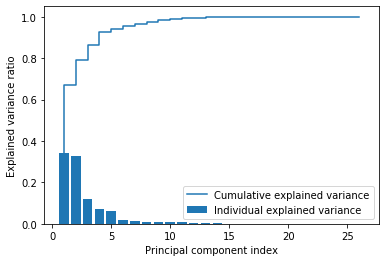

In [227]:
# Plotting explained variance

pca_ev = plt.bar(range(1,27),exp_var,
                label = 'Individual explained variance')
pca_ev = plt.step(range(1,27),cum_exp_var,
                 label = 'Cumulative explained variance')

pca_ev = plt.ylabel("Explained variance ratio")
pca_ev = plt.xlabel("Principal component index")
pca_ev = plt.legend(loc = 'best')
plt.show()

In [228]:
# PCA with 13 components

pca_13 = PCA(n_components = 13)

X_pca_13 = pca_13.fit_transform(X)



In [229]:
# Checking dimension of PCA dataset

X_pca_13.shape

(1700, 13)

In [232]:
# Printing samples of PCA dataset

X_pca_13[0:3]

array([[ 0.91835534, -3.24525833, -1.94058483,  0.27228399, -1.25088049,
        -0.38990798, -0.66340492, -0.68606938, -0.25706793, -0.28129636,
        -0.23658457, -0.10151744,  0.09250265],
       [ 1.01634121, -3.23048342, -1.84809531,  0.27288411, -1.25021318,
        -0.58177591, -0.53950543, -0.68923132, -0.25814658, -0.34897285,
        -0.23779517, -0.02394987,  0.07327174],
       [ 1.07331421, -3.01474636, -1.75610255,  0.21262123, -1.34120179,
        -0.53227191, -0.57414306, -0.82532535, -0.18599097, -0.33835561,
        -0.27987618, -0.03580238,  0.03913091]])

In [235]:
import time

In [234]:
# Splitting dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_i_train,y_i_test  =  train_test_split(X,y_i,test_size = 0.1, stratify = y_i, random_state = 42)

X_pca_train,X_pca_test,y_i_pca_train,y_i_pca_test = train_test_split(X_pca_13,y_i,test_size = 0.1, stratify = y_i, random_state = 42)

In [237]:
# Checking Dimensions

print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_i_train dimension: ", y_i_train.shape)
print("y_i_test dimension: ", y_i_test.shape)

print("X_pca_train dimension: ", X_pca_train.shape)
print("X_pca_test dimension: ", X_pca_test.shape)
print("y_i_pca_train dimension: ", y_i_pca_train.shape)
print("y_i_pca_test dimension: ", y_i_pca_test.shape)

X_train dimension:  (1530, 26)
X_test dimension:  (170, 26)
y_i_train dimension:  (1530,)
y_i_test dimension:  (170,)
X_pca_train dimension:  (1530, 13)
X_pca_test dimension:  (170, 13)
y_i_pca_train dimension:  (1530,)
y_i_pca_test dimension:  (170,)


In [261]:
# Logistic Regression - basic

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

logit      = LogisticRegression(multi_class = 'auto')

solver     = ['liblinear']

penalty    = ['l1','l2']

c          = [100,10,1,0.1,0.01,0.001]

max_iter   = [100,500,1000]

param_grid = [{'penalty' : penalty,'C': c,'max_iter': max_iter,'solver': solver}]


In [288]:
# Model Selection by hyperparameter tuning

t_lr_s     = time.time() 

gs = GridSearchCV(logit,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs.fit(X_train,y_i_train)

t_lr_e     = time.time()


print("time taken for logit with all attributes: ",(t_lr_e - t_lr_s))

time taken for logit with all attributes:  2.195909261703491


In [263]:
gs.best_score_

0.769281045751634

In [264]:
gs.best_params_

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [266]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 100, multi_class = 'auto')

In [267]:
lr.fit(X_train,y_i_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
lr.intercept_

array([1.47989417])

In [274]:
lr.coef_

array([[ 5.14219873e-02, -4.64004409e-01, -2.28972050e+00,
         1.93564739e+00, -5.20234098e-01,  1.15807012e+00,
        -3.16587735e-02,  1.23612726e-01,  5.06601101e-04,
         1.10036255e-01,  8.24719026e-03, -3.16478858e-01,
        -1.11880539e-02, -1.44360815e+00, -9.30400557e-01,
         2.19082975e-02,  1.09240890e-01, -7.00459164e-02,
         4.13330197e-02, -1.02331953e-03, -1.93370699e-01,
         7.98413732e-01,  9.35014159e-02,  6.44202630e-04,
         2.89304942e-01,  2.11433905e-01]])

In [284]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [270]:
y_i_pred_train_lr = lr.predict(X_train)
y_i_pred_test_lr  = lr.predict(X_test)

In [277]:
print(y_i_pred_train_lr[0:100])
print(y_i_pred_test_lr[0:100])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [278]:
print("training accuracy score: ", accuracy_score(y_i_train,y_i_pred_train_lr))
print("test accuracy score: ", accuracy_score(y_i_test,y_i_pred_test_lr))

training accuracy score:  0.7751633986928105
test accuracy score:  0.7470588235294118


In [279]:
print("confusion matrix: ", "\n", confusion_matrix(y_i_test,y_i_pred_test_lr))

confusion matrix:  [[  3  38]
 [  5 124]]


In [283]:
print("classification report: ", "\n", classification_report(y_i_test,y_i_pred_test_lr))

classification report:  
               precision    recall  f1-score   support

           0       0.38      0.07      0.12        41
           1       0.77      0.96      0.85       129

    accuracy                           0.75       170
   macro avg       0.57      0.52      0.49       170
weighted avg       0.67      0.75      0.68       170



In [285]:
print("f1 score: ", "\n", f1_score(y_i_test,y_i_pred_test_lr))

f1 score:  
 0.8522336769759451


In [289]:
# Logistic Regression with PCA

t_lr_s     = time.time() 

gs_pca     = GridSearchCV(logit,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_pca.fit(X_pca_train,y_i_pca_train)

t_lr_e     = time.time()


print("time taken for logit with PCA: ",(t_lr_e - t_lr_s))

time taken for logit with PCA:  0.5431039333343506


In [290]:
gs_pca.best_score_

0.7607843137254902

In [291]:
gs_pca.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [292]:
lr_pca = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 1, multi_class = 'auto')

In [293]:
lr_pca.fit(X_pca_train,y_i_pca_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
lr_pca.intercept_

array([1.0651254])

In [295]:
lr_pca.coef_

array([[-0.00708946, -0.00194843, -0.0261987 ,  0.00437313,  0.00159632,
        -0.00260857, -0.0030673 ,  0.00033455, -0.03117245,  0.04515601,
        -0.3137777 ,  0.05398853,  0.04082823]])

In [296]:
y_i_pred_train_lr_pca = lr_pca.predict(X_pca_train)
y_i_pred_test_lr_pca  = lr_pca.predict(X_pca_test)

In [297]:
print(y_i_pred_train_lr_pca[0:100])
print(y_i_pred_test_lr_pca[0:100])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [298]:
print("training accuracy score with PCA: ", accuracy_score(y_i_pca_train,y_i_pred_train_lr_pca))
print("test accuracy score with PCA: ", accuracy_score(y_i_pca_test,y_i_pred_test_lr_pca))
print("\n")

print("confusion matrix with PCA: ", "\n", confusion_matrix(y_i_pca_test,y_i_pred_test_lr_pca))

print("\n")

print("classification report with PCA: ", "\n", classification_report(y_i_pca_test,y_i_pred_test_lr_pca),"\n")

print("f1 score with PCA: ", "\n", f1_score(y_i_pca_test,y_i_pred_test_lr_pca))


training accuracy score with PCA:  0.7660130718954249
test accuracy score with PCA:  0.7470588235294118


confusion matrix with PCA:  
 [[  2  39]
 [  4 125]]


classification report with PCA:  
               precision    recall  f1-score   support

           0       0.33      0.05      0.09        41
           1       0.76      0.97      0.85       129

    accuracy                           0.75       170
   macro avg       0.55      0.51      0.47       170
weighted avg       0.66      0.75      0.67       170
 

f1 score with PCA:  
 0.8532423208191126


In [310]:
# KNN for all attributes

from sklearn.neighbors import KNeighborsClassifier

knn             = KNeighborsClassifier(algorithm = 'auto')

n_neighbors     = [5,10,25,50,100,200,500]

weights         = ['uniform','distance']

p               = [1,2,3] 

param_grid = [{'n_neighbors' : n_neighbors,'weights': weights,'p': p}]

In [311]:
# Model Selection by hyperparameter tuning

t_knn_s     = time.time() 

gs_knn      = GridSearchCV(knn,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_knn.fit(X_train,y_i_train)

t_knn_e     = time.time()


print("time taken for knn with all attributes: ",(t_knn_e - t_knn_s))

time taken for knn with all attributes:  5.925627946853638


In [312]:
gs_knn.best_score_

0.8359477124183007

In [313]:
gs_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [329]:
knn_0 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1, weights = 'distance') 

In [335]:
knn_0.fit(X_train,y_i_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [336]:
y_i_train_pred  = knn_0.predict(X_train)
y_i_test_pred = knn_0.predict(X_test) 

In [337]:
print(y_i_train_pred[0:10])
print(y_i_test_pred[0:10])

[0 1 1 1 1 0 0 1 1 0]
[1 1 1 1 1 1 1 1 0 1]


In [338]:
print("training accuracy score for KNN : ", accuracy_score(y_i_train,y_i_train_pred))
print("test accuracy score for KNN: ", accuracy_score(y_i_test,y_i_test_pred))
print("\n")

print("confusion matrix for KNN: ", "\n", confusion_matrix(y_i_test,y_i_test_pred))

print("\n")

print("classification report for KNN: ", "\n", classification_report(y_i_test,y_i_test_pred),"\n")

print("f1 score for KNN: ", "\n", f1_score(y_i_test,y_i_test_pred))

training accuracy score for KNN :  1.0
test accuracy score for KNN:  0.788235294117647


confusion matrix for KNN:  
 [[ 16  25]
 [ 11 118]]


classification report for KNN:  
               precision    recall  f1-score   support

           0       0.59      0.39      0.47        41
           1       0.83      0.91      0.87       129

    accuracy                           0.79       170
   macro avg       0.71      0.65      0.67       170
weighted avg       0.77      0.79      0.77       170
 

f1 score for KNN:  
 0.8676470588235293


In [339]:
knn_1 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1, weights = 'uniform')

In [340]:
knn_1.fit(X_train,y_i_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [341]:
knn_1.score(X_train,y_i_train)

0.8712418300653595

In [342]:
knn_1.score(X_test,y_i_test)

0.7764705882352941

In [343]:
y_i_train_pred  = knn_1.predict(X_train)
y_i_test_pred = knn_1.predict(X_test) 

In [344]:
print("training accuracy score for KNN : ", accuracy_score(y_i_train,y_i_train_pred))
print("test accuracy score for KNN: ", accuracy_score(y_i_test,y_i_test_pred))
print("\n")

print("confusion matrix for KNN: ", "\n", confusion_matrix(y_i_test,y_i_test_pred))

print("\n")

print("classification report for KNN: ", "\n", classification_report(y_i_test,y_i_test_pred),"\n")

print("f1 score for KNN: ", "\n", f1_score(y_i_test,y_i_test_pred))

training accuracy score for KNN :  0.8712418300653595
test accuracy score for KNN:  0.7764705882352941


confusion matrix for KNN:  
 [[ 14  27]
 [ 11 118]]


classification report for KNN:  
               precision    recall  f1-score   support

           0       0.56      0.34      0.42        41
           1       0.81      0.91      0.86       129

    accuracy                           0.78       170
   macro avg       0.69      0.63      0.64       170
weighted avg       0.75      0.78      0.76       170
 

f1 score for KNN:  
 0.8613138686131386


In [345]:
# KNN with PCA

t_knn_s_pca     = time.time() 

gs_knn_pca      = GridSearchCV(knn,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_knn_pca.fit(X_pca_train,y_i_pca_train)

t_knn_e_pca     = time.time()


print("time taken for knn with all attributes: ",(t_knn_e_pca - t_knn_s_pca))

time taken for knn with all attributes:  4.2691779136657715


In [346]:
gs_knn_pca.best_score_

0.8196078431372549

In [347]:
gs_knn_pca.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [354]:
knn_2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1, weights = 'distance') 

In [349]:
knn_2.fit(X_pca_train,y_i_pca_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [350]:
knn_2.score(X_pca_train,y_i_pca_train)

1.0

In [351]:
knn_2.score(X_pca_test,y_i_pca_test)

0.8058823529411765

In [353]:
knn_3 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1, weights = 'uniform')

In [355]:
knn_3.fit(X_pca_train,y_i_pca_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [357]:
y_i_train_pred_pca  = knn_3.predict(X_pca_train)
y_i_test_pred_pca   = knn_3.predict(X_pca_test) 

In [358]:
print("training accuracy score for KNN with pca : ", accuracy_score(y_i_pca_train,y_i_train_pred_pca))
print("test accuracy score for KNN with pca: ", accuracy_score(y_i_pca_test,y_i_test_pred_pca))
print("\n")

print("confusion matrix for KNN with pca: ", "\n", confusion_matrix(y_i_pca_test,y_i_test_pred_pca))

print("\n")

print("classification report for KNN with pca: ", "\n", classification_report(y_i_pca_test,y_i_test_pred_pca),"\n")

print("f1 score for KNN with pca: ", "\n", f1_score(y_i_pca_test,y_i_test_pred_pca))

training accuracy score for KNN with pca :  0.8627450980392157
test accuracy score for KNN with pca:  0.788235294117647


confusion matrix for KNN with pca:  
 [[ 11  30]
 [  6 123]]


classification report for KNN with pca:  
               precision    recall  f1-score   support

           0       0.65      0.27      0.38        41
           1       0.80      0.95      0.87       129

    accuracy                           0.79       170
   macro avg       0.73      0.61      0.63       170
weighted avg       0.77      0.79      0.75       170
 

f1 score for KNN with pca:  
 0.8723404255319148


In [359]:
# Decision Tree Classifier for all attributes

from sklearn.tree import DecisionTreeClassifier

dtc             =  DecisionTreeClassifier(random_state = 0)

criterion       = ["gini","entropy"]

max_depth       = [10,20,50,100,200,500] 

param_grid      = [{'criterion' : criterion,'max_depth': max_depth}]

In [360]:
t_dtc_s     = time.time() 

gs_dtc      = GridSearchCV(dtc,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_dtc.fit(X_train,y_i_train)

t_dtc_e     = time.time()


print("time taken for dtc with all attributes: ",(t_dtc_e - t_dtc_s))

time taken for dtc with all attributes:  2.8520519733428955


In [361]:
gs_dtc.best_score_

0.8111111111111111

In [362]:
gs_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [549]:
dtc_0  = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 20)  

In [550]:
dtc_0.fit(X_train,y_i_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [551]:
dtc_0.score(X_train,y_i_train)

1.0

In [552]:
dtc_0.score(X_test,y_i_test)

0.7941176470588235

In [553]:
y_i_train_pred = dtc_0.predict(X_train)
y_i_test_pred  = dtc_0.predict(X_test)

In [554]:
print("training accuracy score for dtc : ", accuracy_score(y_i_train,y_i_train_pred))
print("test accuracy score for dtc: ", accuracy_score(y_i_test,y_i_test_pred))
print("\n")

print("confusion matrix for dtc: ", "\n", confusion_matrix(y_i_test,y_i_test_pred))

print("\n")

print("classification report for dtc: ", "\n", classification_report(y_i_test,y_i_test_pred),"\n")

print("f1 score for dtc: ", "\n", f1_score(y_i_test,y_i_test_pred))

training accuracy score for dtc :  1.0
test accuracy score for dtc:  0.7941176470588235


confusion matrix for dtc:  
 [[ 28  13]
 [ 22 107]]


classification report for dtc:  
               precision    recall  f1-score   support

           0       0.56      0.68      0.62        41
           1       0.89      0.83      0.86       129

    accuracy                           0.79       170
   macro avg       0.73      0.76      0.74       170
weighted avg       0.81      0.79      0.80       170
 

f1 score for dtc:  
 0.8594377510040162


In [ ]:
# DTC with PCA

In [380]:
t_dtc_s_pca     = time.time() 

gs_dtc_pca      = GridSearchCV(dtc,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_dtc_pca.fit(X_pca_train,y_i_pca_train)

t_dtc_e_pca     = time.time()


print("time taken for dtc with pca: ",(t_dtc_e_pca - t_dtc_s_pca))

time taken for dtc with pca:  0.5798370838165283


In [381]:
gs_dtc_pca.best_score_

0.7967320261437908

In [382]:
gs_dtc_pca.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [555]:
dtc_1 = DecisionTreeClassifier(random_state = 0, criterion = "entropy", max_depth = 10)

In [556]:
dtc_1.fit(X_pca_train,y_i_pca_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [557]:
dtc_1.score(X_pca_train,y_i_pca_train)

0.9575163398692811

In [558]:
dtc_1.score(X_pca_test,y_i_pca_test)

0.7647058823529411

In [560]:
y_i_train_pred = dtc_1.predict(X_pca_train)
y_i_test_pred  = dtc_1.predict(X_pca_test)

In [561]:
print("training accuracy score for dtc with pca : ", accuracy_score(y_i_pca_train,y_i_train_pred))
print("test accuracy score for dtc with pca : ", accuracy_score(y_i_pca_test,y_i_test_pred))
print("\n")

print("confusion matrix for dtc with pca : ", "\n", confusion_matrix(y_i_pca_test,y_i_test_pred))

print("\n")

print("classification report for dtc with pca : ", "\n", classification_report(y_i_pca_test,y_i_test_pred),"\n")

print("f1 score for dtc with pca : ", "\n", f1_score(y_i_pca_test,y_i_test_pred))

training accuracy score for dtc with pca :  0.9575163398692811
test accuracy score for dtc with pca :  0.7647058823529411


confusion matrix for dtc with pca :  
 [[ 23  18]
 [ 22 107]]


classification report for dtc with pca :  
               precision    recall  f1-score   support

           0       0.51      0.56      0.53        41
           1       0.86      0.83      0.84       129

    accuracy                           0.76       170
   macro avg       0.68      0.70      0.69       170
weighted avg       0.77      0.76      0.77       170
 

f1 score for dtc with pca :  
 0.8425196850393701


In [398]:
# SVM with all attributes

from sklearn.svm import SVC

svc        = SVC(random_state = 0)

gamma      = ['auto','scale'] 

param_grid = [{'gamma': gamma}]

In [399]:
t_svc_s     = time.time() 

gs_svc      = GridSearchCV(svc,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_svc.fit(X_train,y_i_train)

t_svc_e     = time.time()


print("time taken for svc with all attributes: ",(t_svc_e - t_svc_s))

time taken for svc with all attributes:  0.5309429168701172


In [400]:
gs_svc.best_score_

0.803921568627451

In [401]:
gs_svc.best_params_

{'gamma': 'auto'}

In [402]:
svc_0 = SVC(random_state = 0, gamma ='auto')

In [403]:
svc_0.fit(X_train,y_i_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [404]:
svc_0.score(X_train,y_i_train)

0.865359477124183

In [405]:
svc_0.score(X_test,y_i_test)

0.788235294117647

In [563]:
y_i_train_pred = svc_0.predict(X_train)
y_i_test_pred  = svc_0.predict(X_test)

In [564]:
print("training accuracy score for svc : ", accuracy_score(y_i_train,y_i_train_pred))
print("test accuracy score for svc: ", accuracy_score(y_i_test,y_i_test_pred))
print("\n")

print("confusion matrix for svc: ", "\n", confusion_matrix(y_i_test,y_i_test_pred))

print("\n")

print("classification report for svc: ", "\n", classification_report(y_i_test,y_i_test_pred),"\n")

print("f1 score for svc: ", "\n", f1_score(y_i_test,y_i_test_pred))

training accuracy score for svc :  0.865359477124183
test accuracy score for svc:  0.788235294117647


confusion matrix for svc:  
 [[  6  35]
 [  1 128]]


classification report for svc:  
               precision    recall  f1-score   support

           0       0.86      0.15      0.25        41
           1       0.79      0.99      0.88       129

    accuracy                           0.79       170
   macro avg       0.82      0.57      0.56       170
weighted avg       0.80      0.79      0.73       170
 

f1 score for svc:  
 0.8767123287671234


In [406]:
# Random Forest Classifier - ensembling, with all attributes

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)

n_estimators = [10,25,50,100,200,300,500]

criterion    = ['gini','entropy'] 

max_depth    = [10,20,50,100,200,500]

param_grid   = [{'n_estimators': n_estimators, 'criterion': criterion, 
                 'max_depth': max_depth}]


In [407]:
t_rf_s     = time.time() 

gs_rf      = GridSearchCV(RF,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_rf.fit(X_train,y_i_train)

t_rf_e     = time.time()


print("time taken for RF with all attributes: ",(t_rf_e - t_rf_s))

time taken for RF with all attributes:  155.85361409187317


In [408]:
gs_rf.best_score_

0.8758169934640523

In [409]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 500}

In [505]:
rf_0  =  RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 100, max_depth = 20)

In [506]:
rf_0.fit(X_train,y_i_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [507]:
rf_0.score(X_train,y_i_train)

1.0

In [508]:
rf_0.score(X_test,y_i_test)

0.8588235294117647

In [510]:
y_i_train_pred  = rf_0.predict(X_train)
y_i_test_pred   = rf_0.predict(X_test)

In [513]:
print("training accuracy score for RF : ", accuracy_score(y_i_train,y_i_train_pred))
print("test accuracy score for RF : ", accuracy_score(y_i_test,y_i_test_pred))
print("\n")

print("confusion matrix for RF : ", "\n", confusion_matrix(y_i_test,y_i_test_pred))

print("\n")

print("classification report for RF : ", "\n", classification_report(y_i_test,y_i_test_pred),"\n")

print("f1 score for RF : ", "\n", f1_score(y_i_test,y_i_test_pred))

training accuracy score for RF :  1.0
test accuracy score for RF :  0.8588235294117647


confusion matrix for RF :  
 [[ 24  17]
 [  7 122]]


classification report for RF :  
               precision    recall  f1-score   support

           0       0.77      0.59      0.67        41
           1       0.88      0.95      0.91       129

    accuracy                           0.86       170
   macro avg       0.83      0.77      0.79       170
weighted avg       0.85      0.86      0.85       170
 

f1 score for RF :  
 0.9104477611940298


In [438]:
feat_labels = cs_df.columns[:-1]

importances = rf_0.feature_importances_

indices     = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print ("%2d %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1 Free Cash Flow                 0.060396
 2 ROA                            0.052139
 3 CFO                            0.050835
 4 Net Income Before Extras       0.050371
 5 EPS Before Extras              0.046822
 6 EBITDA                         0.046106
 7 ROE                            0.045067
 8 Gross Margin                   0.044855
 9 PE                             0.044695
10 Current Liquidity              0.043406
11 Total MV                       0.042720
12 Sales/Revenues                 0.042108
13 CFO/Debt                       0.039697
14 Cash                           0.039183
15 EBITDA Margin                  0.034254
16 Total Debt/MV                  0.032948
17 Net Debt/MV                    0.031260
18 Net Debt                       0.029797
19 Total Debt/EBITDA              0.029354
20 Current Liabilities            0.029212
21 Total Liquidity                0.029127
22 Total Debt                     0.028669
23 LT Debt                        0.028223
24 ST Debt 

(-1, 26)

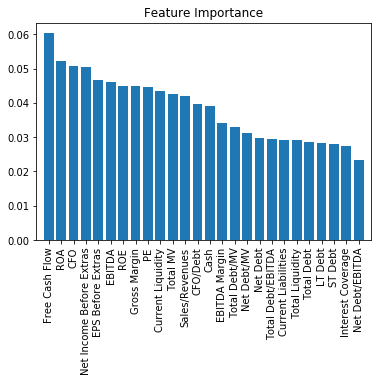

In [514]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align ='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])

In [440]:
rf_1  =  RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 100, max_depth = 20)

In [441]:
rf_1.fit(X_pca_train,y_i_pca_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [442]:
rf_1.score(X_pca_train,y_i_pca_train)

1.0

In [443]:
rf_1.score(X_pca_test,y_i_pca_test)

0.8

In [ ]:
# feature selection to decrease overfitting

# Feature selection using correlation heatmap

# Variables that can be removed because of correlation for feature selection

# from scatter plots 1 -  




# ('EBITDA', 'EBITDA Margin'), 
# ('Net Income Before Extras', 'ROA', 'ROE'), 
# ('Current Liquidity', 'Cash')




# these combinations are correlated, so out of these 7 variables, 3 variables can be selected :
# selection based on correlation with 'InvGrd' & 'Rating' : 
# selected ones for 'InvGrd' : ('EBITDA','Net Income Before Extras', 'Current Liquidity')
# selected ones for 'Rating' : ('EBITDA', 'ROE', 'Current Liquidity')

# from scatter plots 2 - 



# ('Total Debt','LT Debt','Total Debt/EBITDA','Total Debt/MV')
# ('Net Debt/EBITDA','Net Debt/MV', 'Net Debt')
# ('CFO','CFO/Debt')





# these combinations are correlated, so out of these 7 variables, 2 variables can be selected :
# selected ones for 'InvGrd' : ('Total Debt','Net Debt')
# selected ones for 'Rating' : ('Total Debt/MV','Net Debt/MV')

# So from these 14 variables, we can select 5 variables for our model, without loss of explained variance
# (we have to check using evaluation metrics, whether this feature selection gives best results



In [444]:
cs_df.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

In [477]:
# based on correlation heatmap and Random forest feature importance

features = ['Free Cash Flow','ROA','CFO','EPS Before Extras','EBITDA','Gross Margin','PE']
            
    
#,'Current Liquidity','Total MV','Sales/Revenues','Total Debt/MV','Net Debt/MV','Current Liabilities',
#'Total Liquidity','ST Debt','Interest Coverage']

In [478]:
len(features)

7

In [479]:
X_f = X[features]

In [480]:
X_f.shape

(1700, 7)

In [481]:
X_f.head()

,Free Cash Flow,ROA,CFO,EPS Before Extras,EBITDA,Gross Margin,PE
0,0.352997,0.163266,0.068526,0.148305,0.018885,0.030763,0.100409
1,0.352997,0.163266,0.068526,0.148305,0.088716,0.030763,-0.089598
2,0.500174,0.105711,0.068136,0.110656,0.088716,0.023159,-0.045142
3,0.551592,0.162421,0.073784,0.151639,0.088716,0.028400,-0.008231
4,0.753321,0.156427,0.132845,0.130435,0.088716,0.027714,0.015528


In [482]:
X_f.tail()

,Free Cash Flow,ROA,CFO,EPS Before Extras,EBITDA,Gross Margin,PE
1695,1.106048,-4.271318,0.516587,-4.408257,-0.127046,-0.010702,-1.339781
1696,3.336889,-2.868086,1.840865,-2.977064,-0.155183,-0.009799,-1.695900
1697,-2.531238,-1.876336,-2.826901,-1.955285,-0.170022,0.067595,-1.919739
1698,-0.688930,-2.027254,-0.556247,-2.059347,-0.122645,0.007820,-1.462429
1699,2.148336,-1.952314,1.789100,-1.948856,-0.159290,-0.021961,-1.918602


In [483]:
X_f_train,X_f_test,y_i_f_train,y_i_f_test = train_test_split(X_f,y_i,test_size = 0.25,random_state = 42, 
                                                             stratify = y_i)

In [484]:
rf_2  =  RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 100, max_depth = 20)

In [485]:
rf_2.fit(X_f_train,y_i_f_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [486]:
rf_2.score(X_f_train,y_i_f_train)

1.0

In [487]:
rf_2.score(X_f_test,y_i_f_test)

0.8023529411764706

In [517]:
cs_df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [516]:
cs_df_rp.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,1


In [518]:
X_1_train,X_1_test,y_r_train,y_r_test = train_test_split(X,y_r,test_size = 0.1,random_state = 42, 
                                                             stratify = y_r)

In [521]:
y_r_train[0:5]

1416    14
504      5
744     11
1414    14
246      2
Name: Rating, dtype: int64

In [522]:
# Multi class classification

# Decision Tree Classifier


dtc             =  DecisionTreeClassifier(random_state = 0)

criterion       = ["gini","entropy"]

max_depth       = [10,20,50,100,200,500] 

param_grid      = [{'criterion' : criterion,'max_depth': max_depth}]

In [524]:
# Model Selection by hyperparameter tuning

t_dtc_s     = time.time() 

gs_dtc      = GridSearchCV(dtc,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_dtc.fit(X_1_train,y_r_train)

t_dtc_e     = time.time()


print("time taken for dtc with all attributes: ",(t_dtc_e - t_dtc_s))

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


time taken for dtc with all attributes:  2.181307077407837


/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [525]:
gs_dtc.best_score_

0.43594771241830066

In [526]:
gs_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [542]:
dtc_0 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 20)

In [567]:
dtc_0.fit(X_1_train,y_r_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [568]:
dtc_0.score(X_1_train,y_r_train)

1.0

In [569]:
dtc_0.score(X_1_test,y_r_test)

0.47058823529411764

In [574]:
logit      = LogisticRegression(multi_class = 'auto')

penalty    = ['l1','l2']

c          = [100,10,1,0.1,0.01,0.001]

param_grid = [{'penalty' : penalty,'C': c}]

In [575]:
# Model Selection by hyperparameter tuning

t_lr_s     = time.time() 

gs = GridSearchCV(logit,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs.fit(X_1_train,y_r_train)

t_lr_e     = time.time()


print("time taken for logit with all attributes: ",(t_lr_e - t_lr_s))

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time taken for logit with all attributes:  49.56639504432678


/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [576]:
gs.best_score_

0.23006535947712417

In [577]:
gs.best_params_

{'C': 100, 'penalty': 'l1'}

In [583]:
lr_mc = LogisticRegression(multi_class = 'auto', C = 100, penalty = 'l1')

In [584]:
lr_mc.fit(X_1_train,y_r_train)

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [585]:
lr_mc.score(X_1_train,y_r_train)

0.257516339869281

In [586]:
lr_mc.score(X_1_test,y_r_test)

0.21764705882352942

In [533]:
# KNN for all attributes

from sklearn.neighbors import KNeighborsClassifier

knn             = KNeighborsClassifier(algorithm = 'auto')

n_neighbors     = [5,10,25,50,100,200,500]

weights         = ['uniform','distance']

p               = [1,2,3] 

param_grid = [{'n_neighbors' : n_neighbors,'weights': weights,'p': p}]

In [534]:
t_knn_s     = time.time() 

gs_knn      = GridSearchCV(knn,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_knn.fit(X_1_train,y_r_train)

t_knn_e     = time.time()


print("time taken for knn with all attributes: ",(t_knn_e - t_knn_s))

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


time taken for knn with all attributes:  5.451714754104614


/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [535]:
gs_knn.best_score_

0.5104575163398692

In [536]:
gs_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [578]:
knn_mc = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1, weights = 'distance')

In [579]:
knn_mc.fit(X_1_train,y_r_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [580]:
knn_mc.score(X_1_train,y_r_train)

1.0

In [581]:
knn_mc.score(X_1_test,y_r_test)

0.47058823529411764

In [593]:
# SVM with all attributes

from sklearn.svm import LinearSVC

svc        = LinearSVC(random_state = 0,multi_class = 'ovr')

In [594]:
svc.fit(X_1_train,y_r_train)

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [595]:
svc.score(X_1_train,y_r_train)

0.2503267973856209

In [596]:
svc.score(X_1_test,y_r_test)

0.20588235294117646

In [537]:
# Random Forest Classifier - ensembling, with all attributes

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)

n_estimators = [10,25,50,100,200,300,500]

criterion    = ['gini','entropy'] 

max_depth    = [10,20,50,100,200,500]

param_grid   = [{'n_estimators': n_estimators, 'criterion': criterion, 
                 'max_depth': max_depth}]


In [538]:
t_rf_s     = time.time() 

gs_rf      = GridSearchCV(RF,param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs_rf.fit(X_1_train,y_r_train)

t_rf_e     = time.time()


print("time taken for RF with all attributes: ",(t_rf_e - t_rf_s))

/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/rakeshreddy/Files/softwares/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


time taken for RF with all attributes:  298.05332922935486


In [539]:
gs_rf.best_score_

0.6692810457516339

In [540]:
gs_rf.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 300}

In [597]:
rf_mc = RandomForestClassifier(random_state = 0, n_estimators = 300, criterion = 'gini', max_depth = 50)

In [598]:
rf_mc.fit(X_1_train,y_r_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [599]:
rf_mc.score(X_1_train,y_r_train)

1.0

In [600]:
rf_mc.score(X_1_test,y_r_test)

0.7058823529411765

In [601]:
# END